# **Distance Predictor Part 2**
Author: Declan Costello

Date: 7/29/2023

## **Part 2 Description**

Here I clean the data *WITHOUT* imputation or feature engineering, and start predicting batted balls trajectory distance based on launch angle and launch speed

## **Table of Context**

1. [Installation](#Installation)
2. [Inspecting Data](#Inspecting-Data)
3. [Cleaning Data](#Cleaning-Data)
4. [Train Test Split](#Train-Test-Split)
5. [Linear Regression](#Linear-Regression)
6. [Random Forest Regressor](#Random-Forest-Regressor)
5. [Results](#Results)
6. [Future Analysis](#Future-Analysis)

# **Installation**

The following installs the necessary packages

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

# **Inspecting Data**

In [2]:
data = pd.read_csv('pybaseball_2022.csv')

In [3]:
data = data[data['events'].isin(["field_out", "single", "double",  "triple", "home_run"])]

data = data[['hit_distance_sc','launch_angle','launch_speed']]

In [4]:
print(data.shape)

data.isnull().sum().sort_values(ascending=False)

(119977, 3)


hit_distance_sc    3661
launch_speed       3579
launch_angle       3469
dtype: int64

# **Cleaning Data**

In [5]:
data = data[data['hit_distance_sc'].notna()]
data = data[data['launch_speed'].notna()]
data = data[data['launch_angle'].notna()]

# **Train Test Split**

In [6]:
feature_cols = ['launch_angle', 'launch_speed']
X = data.loc[:, feature_cols]

target_cols = ['hit_distance_sc']
y = data.loc[:, target_cols]

X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2,random_state=0) # THIS ONE PREDICTS DISTANCE... STILL SWP NAMES?#

In [7]:
def score_dataset(X_train, X_valid, y_train, y_valid):
    model = RandomForestRegressor(n_estimators=100, random_state=0)
    model.fit(X_train, y_train)
    preds = model.predict(X_valid)
    return mean_absolute_error(y_valid, preds)

score_dataset(X_train, X_valid, y_train, y_valid)

/var/folders/vc/prq7ffv51gl630xh6bmjgj700000gp/T/ipykernel_361/1614683412.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


11.89802820542087

# **Linear Regression**

In [8]:
model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

In [9]:
ps_LR = model.predict(X_valid)

LinearRegression_mean_squared_error = mean_squared_error(y_valid, ps_LR)
print("LinearRegression mean_absolute_error: " + str(LinearRegression_mean_squared_error))

LinearRegression_mean_absolute_error = mean_absolute_error(y_valid, ps_LR)
print("LinearRegression mean_absolute_error:  " + str(LinearRegression_mean_absolute_error))

LinearRegression_model_score = model.score(X_valid, y_valid)
print("LinearRegression model.score():         " + str(LinearRegression_model_score))

LinearRegression mean_absolute_error: 9652.296255873014
LinearRegression mean_absolute_error:  83.50043383571156
LinearRegression model.score():         0.4679106831849482


# **Random Forest Regressor**

In [10]:
model = RandomForestRegressor()

model.fit(X_train, y_train)

/var/folders/vc/prq7ffv51gl630xh6bmjgj700000gp/T/ipykernel_361/659416034.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


RandomForestRegressor()

In [11]:
ps_RandomForestRegressor = model.predict(X_valid)

RandomForestRegressor_mean_squared_error = mean_squared_error(y_valid, ps_RandomForestRegressor)
print("RandomForestRegressor mean_absolute_error: " + str(RandomForestRegressor_mean_squared_error))

RandomForestRegressor_mean_absolute_error = mean_absolute_error(y_valid, ps_RandomForestRegressor)
print("RandomForestRegressor mean_absolute_error:  " + str(RandomForestRegressor_mean_absolute_error))
RandomForestRegressor_model_score = model.score(X_valid, y_valid)

print("RandomForestRegressor model.score():         " + str(RandomForestRegressor_model_score))

RandomForestRegressor mean_absolute_error: 321.8368770401522
RandomForestRegressor mean_absolute_error:  11.887568023798703
RandomForestRegressor model.score():         0.9822585258998875


#  **Results**

In [12]:
results_df = pd.DataFrame(columns=['Model','Mean Squared Error','Mean Absolute Error','Model Score'])

results_df.loc[0] = ['Linear Regression',LinearRegression_mean_squared_error,LinearRegression_mean_absolute_error,LinearRegression_model_score]

results_df.loc[1] = ['Random Forest Regressor', RandomForestRegressor_mean_squared_error, RandomForestRegressor_mean_absolute_error, RandomForestRegressor_model_score]  # adding a row

results_df

,Model,Mean Squared Error,Mean Absolute Error,Model Score
0,Linear Regression,9652.296256,83.500434,0.467911
1,Random Forest Regressor,321.836877,11.887568,0.982259


**barplots**

<Figure size 3200x500 with 0 Axes>

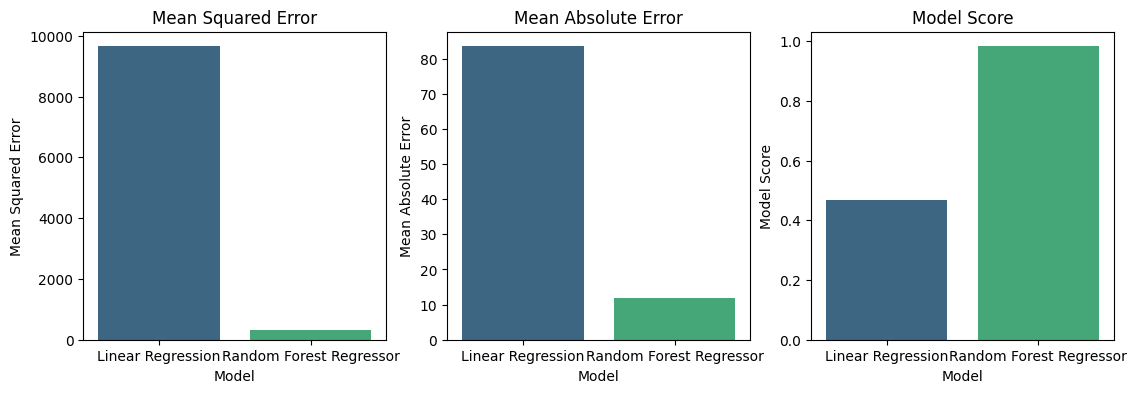

In [13]:
#only turning off for graph
import warnings
warnings.filterwarnings("ignore")

plt.figure(figsize=(32,5))

fig, axes = plt.subplots(1, 3, figsize=(18, 4))

plt.subplot(141)
sns.barplot(data=results_df, x="Model", y="Mean Squared Error", palette='viridis')
plt.title('Mean Squared Error')

plt.subplot(142)
sns.barplot(data=results_df, x="Model", y="Mean Absolute Error", palette='viridis')
plt.title('Mean Absolute Error')

plt.subplot(143)
sns.barplot(data=results_df, x="Model", y="Model Score", palette='viridis')
plt.title('Model Score')

plt.show()

**[Regression Confusion Matric](https://medium.com/@dave.cote.msc/experimenting-confusion-matrix-for-regression-a-powerfull-model-analysis-tool-7c288d99d437), at what distance is the model most Accurate?**

In [14]:
y_valid['actual_hit_distance_sc_binned'] = pd.qcut(y_valid['hit_distance_sc'], q=8, precision=0)

y_valid = y_valid.reset_index()

y_valid = y_valid.reset_index()

y_valid = y_valid.rename(columns={'level_0': 'key'})

In [15]:
df_predicted_RFR = pd.DataFrame(ps_RandomForestRegressor, columns=['predicted_hit_distance_sc'])

bins = [-1, 7, 27, 96, 174, 239, 293, 345, 490]

df_predicted_RFR['predicted_hit_distance_sc_binned_RFR'] = pd.cut(df_predicted_RFR['predicted_hit_distance_sc'], bins)

df_predicted_RFR = df_predicted_RFR.reset_index()

df_predicted_RFR = df_predicted_RFR.rename(columns={'index': 'key'})

result = pd.merge(y_valid, df_predicted_RFR, on="key")
result_heatmap = result.pivot_table(index='actual_hit_distance_sc_binned', columns='predicted_hit_distance_sc_binned_RFR', aggfunc='count')

In [16]:
df_predicted_LR = pd.DataFrame(ps_LR, columns=['predicted_hit_distance_sc'])

bins = [-1, 7, 27, 96, 174, 239, 293, 345, 490]

df_predicted_LR['predicted_hit_distance_sc_binned_LR'] = pd.cut(df_predicted_LR['predicted_hit_distance_sc'], bins)

df_predicted__LR = df_predicted_LR.reset_index()

df_predicted__LR = df_predicted__LR.rename(columns={'index': 'key'})

result_2 = pd.merge(y_valid, df_predicted__LR, on="key")

result_2_heatmap = result_2.pivot_table(index='actual_hit_distance_sc_binned', columns='predicted_hit_distance_sc_binned_LR', aggfunc='count')

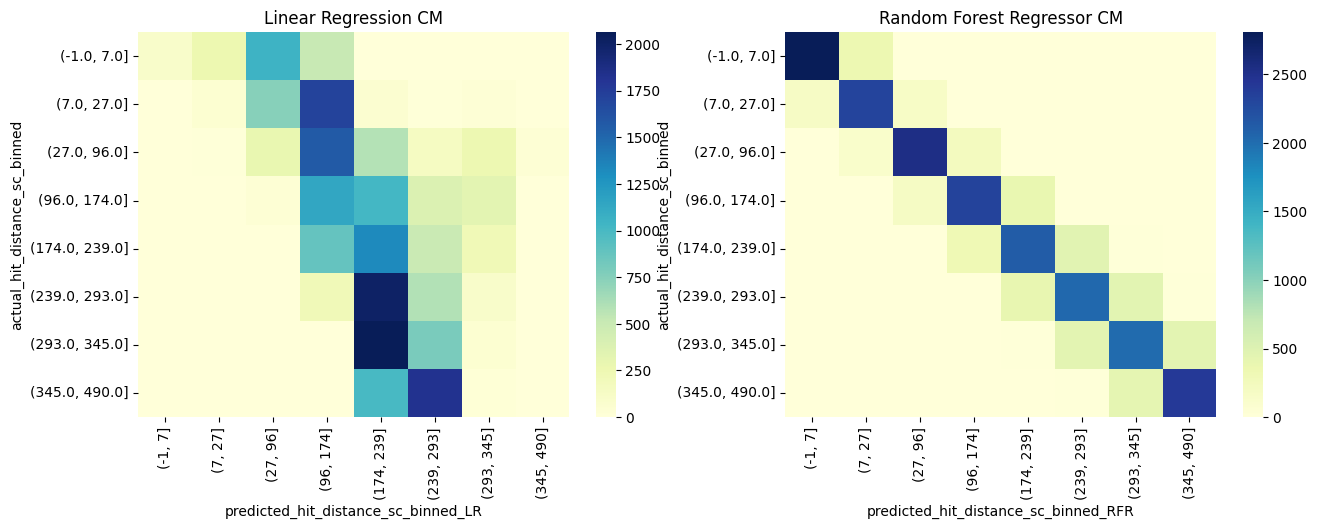

In [17]:
plt.figure(figsize=(32,5))

plt.subplot(141)
sns.heatmap(result_2_heatmap['hit_distance_sc'],cmap="YlGnBu")
plt.title('Linear Regression CM')

plt.subplot(142)
sns.heatmap(result_heatmap['hit_distance_sc'],cmap="YlGnBu")
plt.title('Random Forest Regressor CM')

plt.show()

 # **Future Analysis**

In the future, I plan to implement imputation, normalize, feature engineer, and hyperparameter tune